## MNIST Dataset - Dimensionality Reduction

## Project Overview

- Dataset: MNIST, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
- Apply a Random Forest classification algorithm
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

### Data Analysis
- Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
#import dataset
import pandas as pd
import numpy as np
mnist = pd.read_csv('./mnist_dataset.csv', delimiter=',', nrows = None)
mnist.shape

(70000, 786)

In [2]:
#checking dataset
mnist.head(2)

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#dropping the unnamed column
mnist.drop(mnist.columns[0], axis=1, inplace=True)
mnist.head(2)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#splitting train and test set
X_train = mnist.iloc[:60000,1:]
y_train = mnist.iloc[:60000,0]

X_test = mnist.iloc[60000:,1:]
y_test = mnist.iloc[60000:,0]

In [5]:
#checking train set
X_train.head(2)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#train set shape
X_train.shape

(60000, 784)

In [7]:
#checking y train
y_train.head(2)

0    2
1    5
Name: label, dtype: int64

In [8]:
#reshaping to check data visually
X_train_temp = X_train.values.reshape(60000, 28, 28)
X_test_temp = X_test.values.reshape(10000, 28, 28)

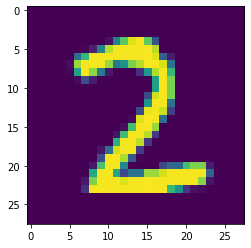

In [9]:
#plotting first X train
import matplotlib.pyplot as plt
plt.imshow(X_train_temp[0])

In [10]:
#checking first y train
y_train[0]

2

- Dataset was split into training and test set

### Perform model
Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [11]:
#Training the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier(random_state=42)

In [12]:
#Checking the time it takes to train the Random Forest classifier

import time
t0 = time.time()
Random_Forest_Classifier.fit(X_train, y_train)
t1 = time.time()

print("Training time: {:.2f}s".format(t1 - t0))

Training time: 44.70s


In [13]:
#Checking the accuracy score for the random forest classifier

from sklearn.metrics import accuracy_score
y_predicted = Random_Forest_Classifier.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9702

- The training time is 44.7s and the accuracy score is 97%.

### Dimensionality Reduction - PCA
Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Evaluate if training was much faster. Next evaluate the classifier on the test set.

In [14]:
#Reducing the dataset dimensionality with PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca_train_X = pca.fit_transform(X_train)

In [15]:
#Training a new Random Forest classifier
Random_Forest_Classifier_pca = RandomForestClassifier(random_state=42)
t0 = time.time()
Random_Forest_Classifier_pca.fit(pca_train_X, y_train)
t1 = time.time()

print("Training time: {:.2f}s".format(t1 - t0))

Training time: 97.43s


In [16]:
#Checking the accuracy with pca

pca_X_test = pca.transform(X_test)
y_predicted = Random_Forest_Classifier_pca.predict(pca_X_test)
accuracy_score(y_test, y_predicted)

0.9508

- After using PCA to reduced the dimensionality, the training time more than doubled and the the accuracy score was reduced by around 2%. So, in this case, the dimensionality reduction made training much slower and reduced the performance.

### Dimensionality Reduction - t-SNE
Use t-SNE to reduce the MNIST dataset, show result graphically.

In [17]:
# YOUR CODE HERE
#Splitting the dataset into X and y
X = mnist.iloc[:,1:]
y = mnist.iloc[:,0]

#Using t-SNE to reduce dimensionality

from sklearn.manifold import TSNE

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42, verbose = 2)
TSNE_X = tsne.fit_transform(X)
t1 = time.time()
print("TSNE time: {:.1f}s.".format(t1 - t0))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 70000 samples in 0.044s...
[t-SNE] Computed neighbors for 70000 samples in 259.839s...
[t-SNE] Computed conditional probabilities for sample 1000 / 70000
[t-SNE] Computed conditional probabilities for sample 2000 / 70000
[t-SNE] Computed conditional probabilities for sample 3000 / 70000
[t-SNE] Computed conditional probabilities for sample 4000 / 70000
[t-SNE] Computed conditional probabilities for sample 5000 / 70000
[t-SNE] Computed conditional probabilities for sample 6000 / 70000
[t-SNE] Computed conditional probabilities for sample 7000 / 70000
[t-SNE] Computed conditional probabilities for sample 8000 / 70000
[t-SNE] Computed conditional probabilities for sample 9000 / 70000
[t-SNE] Computed conditional probabilities for sample 10000 / 70000
[t-SNE] Computed conditional probabilities for sample 11000 / 70000
[t-SNE] Computed conditional probabilities for sample 12000 / 70000
[t-SNE] Computed conditional probabilities for s

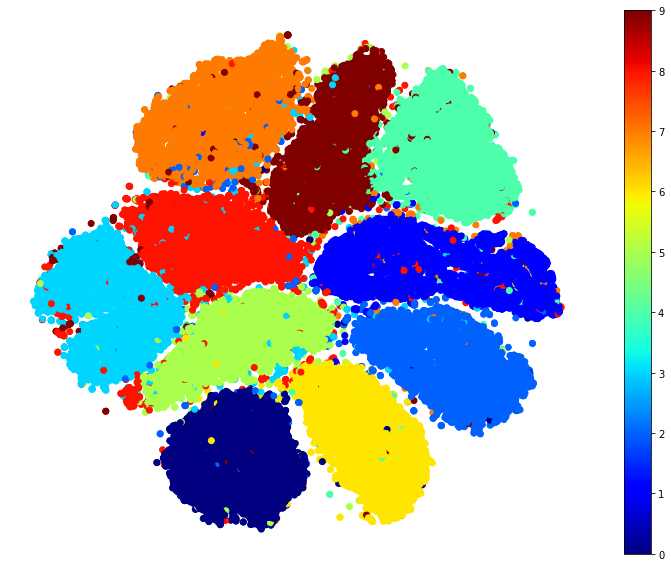

In [18]:
#Showing result graphically
plt.figure(figsize=(13,10))
plt.scatter(TSNE_X[:, 0], TSNE_X[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

Training took a long time and the results are not so good visually, so we can try a smaller dataset.

In [19]:
#Using a smaller dataset

m = 10000
idx = np.random.permutation(70000)[:m]

X_red = mnist.iloc[idx,1:]
y_red = mnist.iloc[idx,0]

#Using t-SNE to reduce dimensionality with the reduced dataset

from sklearn.manifold import TSNE

t0 = time.time()
tsne = TSNE(n_components=2, random_state=42, verbose = 2)
TSNE_X_red = tsne.fit_transform(X_red)
t1 = time.time()
print("TSNE time with reduced dataset: {:.1f}s.".format(t1 - t0))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 4.492s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 430.076610
[t-SNE] Computed conditional probabilities in 1.081s
[t-SNE] Iteration 50: error = 97.6740341, gradient norm = 0.0002413 (50 iterations in 4.653s)
[t-SNE] 

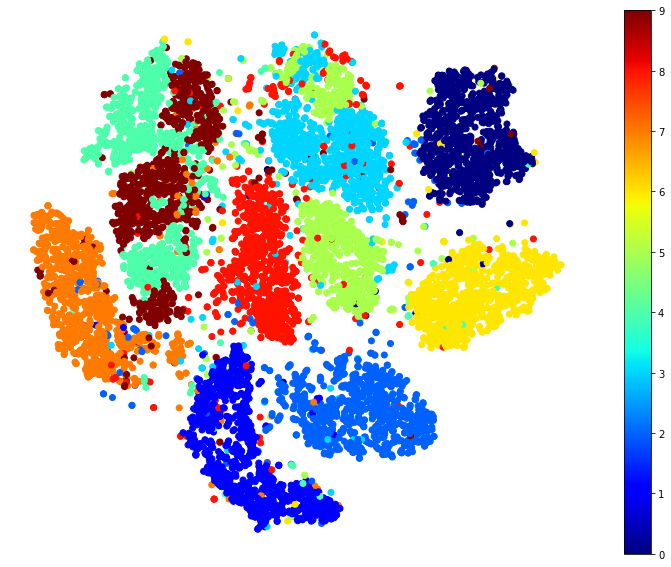

In [20]:
#Showing result graphically
plt.figure(figsize=(13,10))
plt.scatter(TSNE_X_red[:, 0], TSNE_X_red[:, 1], c=y_red, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

- We have distinct clusters visually, with some overlap between then. It also seems that for some numbers we have two clusters.

- Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) and _Multidimensional scaling_ (MDS).

LLE time: 21.0s.


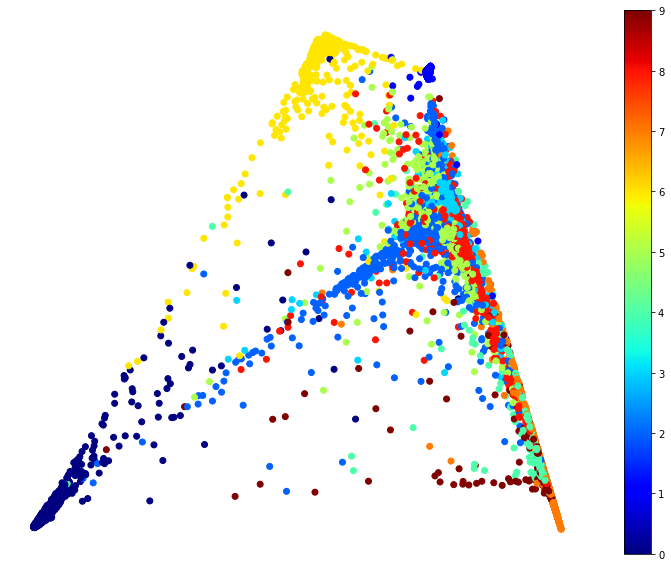

In [21]:
#Starting with LLE method

from sklearn.manifold import LocallyLinearEmbedding

#Checking time and showing result graphically
t0 = time.time()
LLE_X_red = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X_red)
t1 = time.time()
print("LLE time: {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(LLE_X_red[:, 0], LLE_X_red[:, 1], c=y_red, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

- Although the training time is reduced, the results does not look as good as t-SNE. We can see some clusters, but not as distinct, and there is way more overlapping.

MDS time 4968.4s.


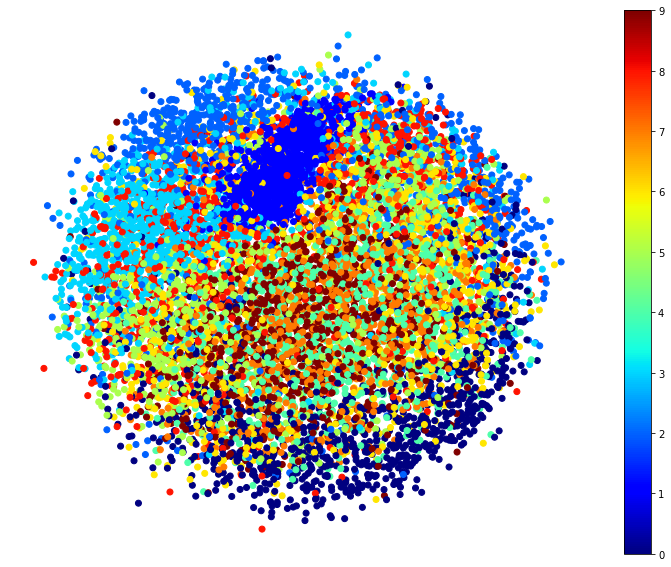

In [22]:
#Now MDS

from sklearn.manifold import MDS

t0 = time.time()
MDS_X_red = MDS(n_components=2, random_state=42).fit_transform(X_red)
t1 = time.time()
print("MDS time {:.1f}s.".format(t1 - t0))

#Checking time and showing result graphically
plt.figure(figsize=(13,10))
plt.scatter(MDS_X_red[:, 0], MDS_X_red[:, 1], c=y_red, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

- The training for MDS is much slower than the two previous models, and there is quite a bit of overlapping.

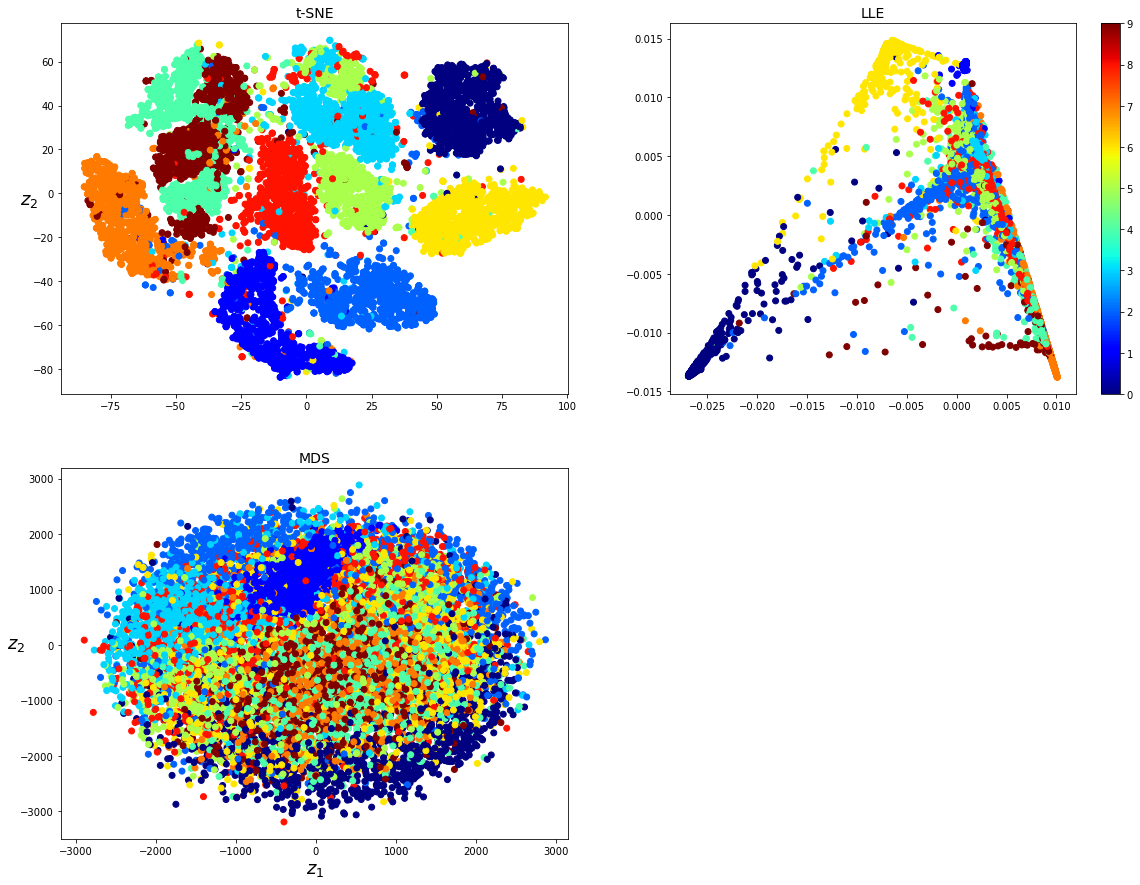

In [23]:
#Comparing all models

titles = ["t-SNE", "LLE", "MDS"]

plt.figure(figsize=(20, 15))

for subplot, title, X_reduced in zip((221, 222, 223), titles,(TSNE_X_red, LLE_X_red, MDS_X_red)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_red, cmap="jet")
    if subplot in [223, 224]:
        plt.xlabel("$z_1$", fontsize=18)
    if subplot in [221, 223]:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    if subplot in [222, 224]:
        plt.colorbar()
plt.show()

MDS time 453.9s.


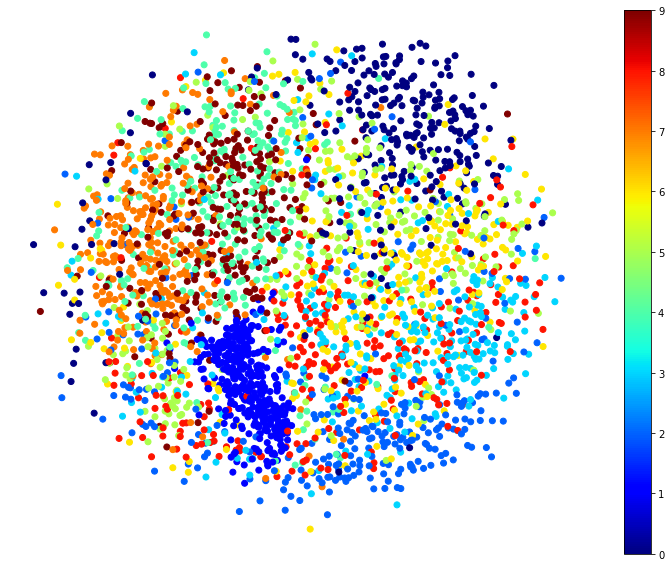

In [26]:
#MDS on reduced dataset for better visualization

m = 3000
t0 = time.time()
MDS_X_red = MDS(n_components=2, random_state=42).fit_transform(X_red[:m])
t1 = time.time()
print("MDS time {:.1f}s.".format(t1 - t0))

#Checking time and showing result graphically
plt.figure(figsize=(13,10))
plt.scatter(MDS_X_red[:, 0], MDS_X_red[:, 1], c=y_red[:m], cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

- Comparing the dimensionality reduction algorithms, we can see that the t-SNE is about 4.5 slower than LLE but is way faster than the MDS. t-SNE also produces better results, with distinct clusters and less overlapping than LLE and MDS.